In [1]:
# coding：utf8
import pandas as pd

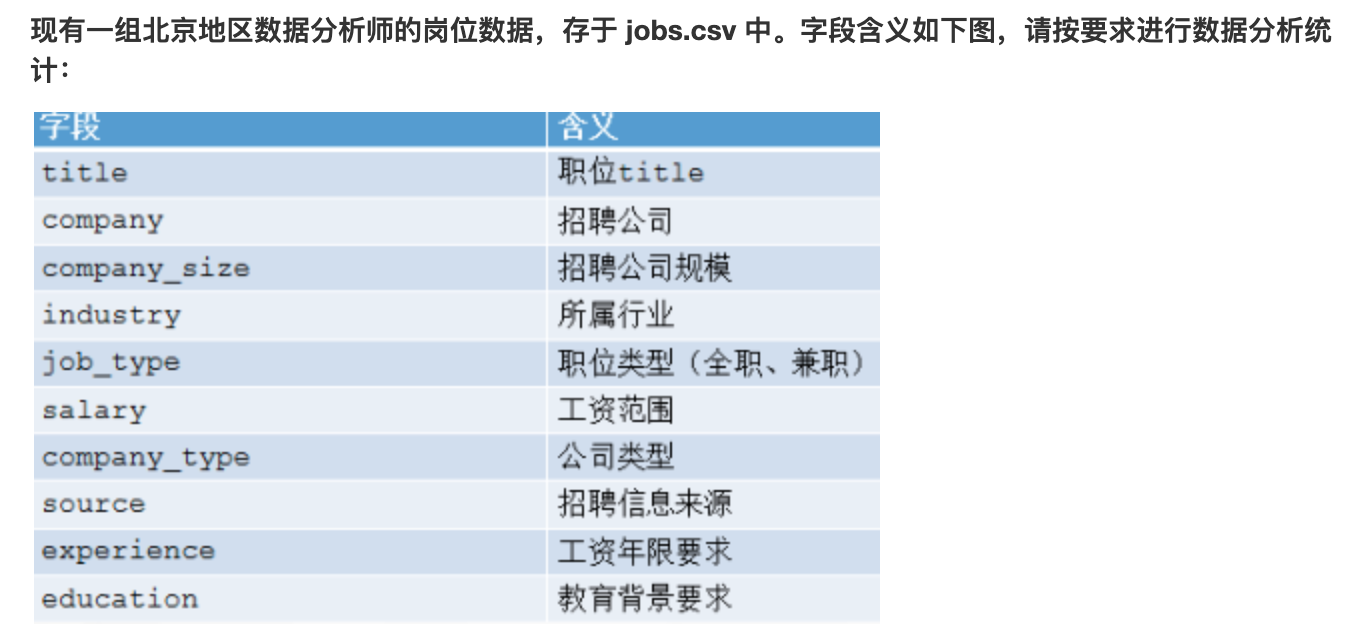

#### 利用 pandas 读取 csv 格式数据文件，去除其中的重复值，并展示前部数据（阅读参考文章①②）
>①　python 去除重复行 https://blog.csdn.net/erinapple/article/details/79332780

>②　pandas读取csv文件的操作 https://blog.csdn.net/Bin_1022/article/details/83413470

In [5]:
data = pd.read_csv('jobs.csv')
data_new = data.drop_duplicates()
data_new.head()

,title,company,company_size,industry,type,salary,company_type,source,experience,education,salary2
0,招聘数据分析师,北京越铖国际科技有限公司,20-99人,人事/行政/高级管理,全职,8000-12000,民营,斗米,不限,不限,10000.0
1,数据分析师,北京新东方教育科技（集团）有限公司,NaN,计算机/互联网/信息技术,全职,12000-20000,民营,OFweek人才网,不限,不限,16000.0
2,数据分析师(新浪),新浪网技术(中国)有限公司,2000-5000人,数据分析师,全职,20000-25000,外商独资/办事处,猎聘,3-5年,本科,22500.0
3,数据分析师,北京美科思远环境科技有限公司,20-99人,环保/环境科学类,全职,12000-20000,股份制,北极星招聘,不限,硕士,16000.0
4,助理、临床样本库采样人员、软件工程师、数据库管理工程师、机械设计与结构工程师、Android...,中国人民解放军总医院（北京市解放军医学院）,NaN,医疗,全职,面议,公立医院,康强医疗人才网,不限,不限,NaN


#### 统计数据表中的招聘岗位都来自于哪些网站（阅读参考文章③④）
>③　Pandas 查看数据 https://blog.csdn.net/shangboerds/article/details/83514528

>④　value_counts()的基础及进阶用法 https://blog.csdn.net/Late_whale/article/details/103317396

In [6]:
data_new['source'].value_counts()

猎聘           580
OFweek人才网     33
斗米            17
北极星招聘          5
百姓网            5
普工招聘网          4
工厂直聘网          2
康强医疗人才网        1
Name: source, dtype: int64

#### 统计数据分析师这个岗位，对于工作经验的要求（阅读参考文章③④）

In [18]:
data_new['experience'].value_counts()

3-5年     232
1-3年     197
不限       142
5-10年     75
10年以上      4
Name: experience, dtype: int64

#### 统计该地区数据分析岗位对于教育背景的要求（阅读参考文章③④）

In [19]:
data_new['education'].value_counts()

本科    489
不限     71
硕士     54
大专     26
初中      9
博士      1
Name: education, dtype: int64

#### 请统计出不同类型公司的职位数量（阅读参考文章③④）

In [20]:
data_new['company_type'].value_counts()

民营          458
上市公司         62
外商独资/办事处     45
中外合资/合作      42
国企           34
事业单位          4
个人企业          2
公立医院          1
其它            1
股份制           1
Name: company_type, dtype: int64

#### 所有职位的平均工资是多少

In [21]:
data_new['salary2'].mean()

14409.894688644688

#### 请统计平均薪资（即 salary2）排在前 10 位的招聘公司及金额（阅读参考文章⑤⑥）
>⑤　利用GroupBy技术进行分组 https://blog.csdn.net/weixin_38168620/article/details/80100201

>⑥　pandas使用sort_values排序 https://www.jianshu.com/p/d12af2b287b6

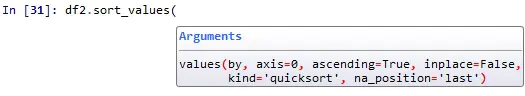

In [34]:
import numpy as np
data_new.groupby('company')['salary2'].agg([('平均薪资','mean')]).sort_values(by='平均薪资',ascending=False).head(10)

,平均薪资
company,
xx公司,25000.0
欧科互动网络科技(北京)有限公司,25000.0
中商利高科技(北京)有限公司,25000.0
北京某互联网公司,25000.0
中建材信息技术股份有限公司,25000.0
北京奇元科技有限公司,25000.0
某互联网公司,25000.0
清控紫荆(北京)教育科技股份有限公司,25000.0
中网数据(北京)股份有限公司,25000.0


#### 请统计发布职位数排在前 10 位的招聘公司及其职位数量（阅读参考文章⑤⑥）

In [38]:
data_new.groupby('company')['title'].agg([('职位数量','count')]).sort_values(by='职位数量',ascending=False).head(10)

,职位数量
company,
百度在线网络技术(北京)有限公司,7
车好多旧机动车经纪(北京)有限公司,7
深圳索信达数据技术有限公司,7
海南小易到家电子商务有限公司上海分公司,6
贝壳找房(北京)科技有限公司,5
苏州皇亭电子有限公司,5
广联达科技股份有限公司,4
北京嘀嘀无限科技发展有限公司,4
北京中油瑞飞信息技术有限责任公司,4


#### 请统计出平均工资排在前 10 位的公司类型及平均工资金额（阅读参考文章⑤⑥）

In [40]:
data_new.groupby('company_type')['salary2'].agg([('平均工资','mean')]).sort_values(by='平均工资',ascending=False).head(10)

,平均工资
company_type,
外商独资/办事处,17468.750000
股份制,16000.000000
民营,14378.595718
上市公司,14367.346939
事业单位,14166.666667
中外合资/合作,13357.142857
个人企业,13250.000000
国企,12846.153846
其它,10000.000000
